### Trộn ảnh - image funcion
- Trộn ở mức Pixel - Pixel level fusion: pixel + pixel --> điểm ảnh mới

<image src="Image\Pixel level fusion.png" width="70%" style="display: block; margin: 0 auto">

- Trộn ở mức đặc trưng - Feature level fusion --> Tìm các đặc trưng và xử lý bằng các đặc trưng đó (xem thêm thuật toán SIFT và SURF)

<image src="Image\Feature level fusion.png" width="70%" style="display: block; margin: 0 auto">

- Decision level fusion

<image src="Image\Decision level fusion.png" width="70%" style="display: block; margin: 0 auto">

#### Ứng dụng của trộn ảnh

Phương pháp trộn ảnh bằng mức sáng (Exposure Fusion) dùng để xây dựng các ảnh có độ sáng ở tất cả các vùng đều tốt tương tự như ảnh HDR(High Dynamic Range) nhờ việc ghép nhiều ảnh có các mức sáng khác nhau lại để tất cả các vùng dù là hilight hay shadow đều có độ sáng đầy đủ.

<image src="Image\HDR1.png" width="70%" style="display: block; margin: 0 auto">

<image src="Image\HDR2.png" width="70%" style="display: block; margin: 0 auto">

Đơn giản hơn là phương pháp trộn ảnh theo trọng số sẽ giúp tạo hiệu ứng chuyển tiếp ảnh khi thay đổi trọng số (mức đóng góp của 2 ảnh gốc để tạo ra ảnh hiển thị)

<image src="Image\Image Translation.gif" width="70%" style="display: block; margin: 0 auto">

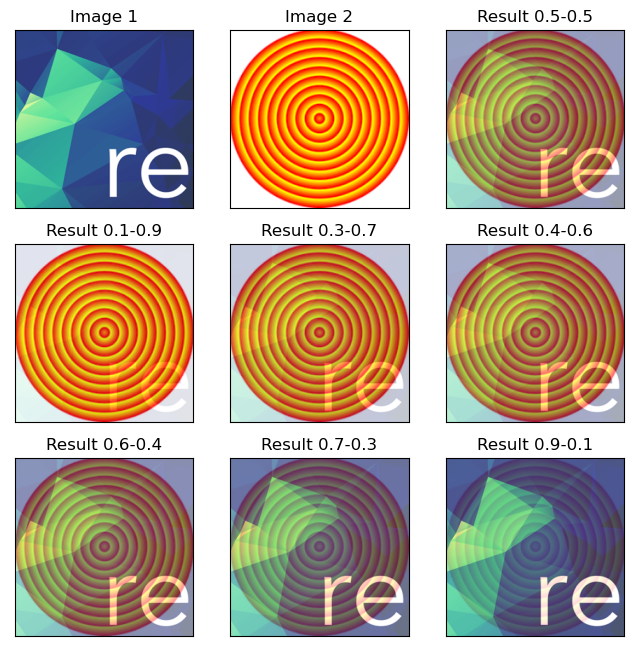

In [38]:
from matplotlib import pyplot as plt
import cv2
import numpy as np


def Show(pos, image, name, gray=False, hideTisks=False):
    plt.subplot(pos)
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    if hideTisks:
        plt.xticks([]), plt.yticks([])


image1 = cv2.imread('Data\icon.png', cv2.IMREAD_COLOR)
image2 = cv2.imread('Data\icon2.png', cv2.IMREAD_COLOR)
(w, h, c) = image1.shape
image2 = cv2.resize(image2,(w,h)) #  Làm cho 2 ảnh có kích thước bằng nhau
dst = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)

plt.gcf().set_size_inches(20 / 2.54, 20 / 2.54)
Show(331, image1, "Image 1", False, True)
Show(332, image2, "Image 2", False, True)
Show(333, dst, "Result 0.5-0.5", False, True)
for i in range (2,4):
    for j in range(1,4):
        pos = (i-2)*3 + j
        w1 = 1./7*pos
        w2 = 1. - w1
        dst = cv2.addWeighted(image1, w1, image2, w2, 0)
        Show(330 + 3 + pos, dst, f'Result {w1:.1f}-{w2:.1f}', False, True)
plt.show()
